El siguiente código presenta un tratamiento y análisis de transporte de pasajeros de transporte terrestre en Colombia desde el años 2019.
La data proviene del recurso público https://www.datos.gov.co/Transporte/Operaci-n-de-pasajeros-y-despacho-de-veh-culos-en-/eh75-8ah6, y el documento de códificación de municipios desde https://geoportal.dane.gov.co/geovisores/territorio/consulta-divipola-division-politico-administrativa-de-colombia/

La explicación de observaciones se evidencia en puntos específicos y después de algunas gráficas realizadas.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# **Exportación y preprocesamiento de datos**

Antes de comenzar con el trabajo de análisis se implementará un primer tratamiento que constará de agregar los datos de DIVIPOLA extraidos del DANE al archivo de operación terrestre extraido de Datos.gov

In [18]:
#Leer documento de despacho de pasajeros terrestres y visualizar los primeros renglones de este documento

data = pd.read_csv('D:\Descargas\Operaci_n_de_pasajeros_y_despacho_de_veh_culos_en_la_modalidad_de_transporte_de_pasajeros_por_carretera1.csv', encoding="utf-8")

#Debido a un dato de tipo incorrecto sobre una de las columnas en esta versión del archivo, es necesario implementar
#la conversión de dato antes de continuar con el proceso de análisis, la conversión directa con el reemplazo genera problemas
#al querer realizar operaciones matemáticas sobre este campo
def replace_comma(value):
    if isinstance(value, str) and ',' in value and '.' not in value:
        return float(value.replace(',', ''))
    return value  #Al requerir ser string para reemplazo de carácteres no númericos, se implementan los reemplazos para volver a formato numérico ideal

data['PASAJEROS'] = data['PASAJEROS'].apply(replace_comma)
data['PASAJEROS'] = data['PASAJEROS'].astype(int)

data.head()

C:\Users\NICOL\AppData\Local\Temp\ipykernel_6792\3025093301.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('D:\Descargas\Operaci_n_de_pasajeros_y_despacho_de_veh_culos_en_la_modalidad_de_transporte_de_pasajeros_por_carretera1.csv', encoding="utf-8")


,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,MUNICIPIO_ORIGEN_RUTA,MUNICIPIO_DESTINO_RUTA,FECHA_DESPACHO,HORA_DESPACHO,TIPO_DESPACHO,DESPACHOS,PASAJEROS
0,T.T. DE BOGOTÁ NORTE,MICROBUS,LUJO,11001,15759,03/01/2021 12:00:00 AM,8,TRANSITO,2,0
1,T.T. DE BOGOTÁ SALITRE,BUS,LUJO,11001,76001,03/12/2021 12:00:00 AM,11,ORIGEN,4,45
2,T.T. DE CALI,BUSETA,BASICO,76001,52378,01/09/2021 12:00:00 AM,6,ORIGEN,1,3
3,T.T. DE MELGAR,BUS,BASICO,73001,11001,08/13/2021 12:00:00 AM,16,TRANSITO,1,10
4,T.T. DE MELGAR,MICROBUS,BASICO,73449,25488,02/28/2021 12:00:00 AM,12,ORIGEN,1,1


In [19]:
#Poseemos un documento con la códificación interna de los municipios y departamentos del país, el cual podemos implementar
#y realizar análisis con mayor claridad y personalización

#Leer documento de excel que contiene códigos de municipios y poder transformar coincidencia en el documento anterior
municipios_nombre = pd.read_excel('d:\Descargas\DIVIPOLA_Municipios.xlsx', sheet_name="Hoja1")
municipios_nombre.head()


,Código dept,NombreDepartamento,CódigoMunicipio,NombreMunicipio
0,5,ANTIOQUIA,5001,MEDELLÍN
1,5,ANTIOQUIA,5002,ABEJORRAL
2,5,ANTIOQUIA,5004,ABRIAQUÍ
3,5,ANTIOQUIA,5021,ALEJANDRÍA
4,5,ANTIOQUIA,5030,AMAGÁ


In [20]:
# Realizar el mapeo del código con el municipio y departamento
codigo_municipio_map = dict(zip(municipios_nombre['CódigoMunicipio'], municipios_nombre['NombreMunicipio']))
codigo_departamento_map = dict(zip(municipios_nombre['CódigoMunicipio'], municipios_nombre['NombreDepartamento']))

#print(codigo_departamento_map)
#print(codigo_municipio_map)

#Agregar nombre al documento de trasnporte terrestre con la coincidencia de códigos
data['MUNICIPIO_DESTINO'] = data['MUNICIPIO_DESTINO_RUTA'].map(codigo_municipio_map)
data['DEPARTAMENTO_DESTINO'] = data['MUNICIPIO_DESTINO_RUTA'].map(codigo_departamento_map)
data['MUNICIPIO_ORIGEN'] = data['MUNICIPIO_ORIGEN_RUTA'].map(codigo_municipio_map)
data['DEPARTAMENTO_ORIGEN'] = data['MUNICIPIO_ORIGEN_RUTA'].map(codigo_departamento_map)

#Muestra de la nueva transformación
data.head()

,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,MUNICIPIO_ORIGEN_RUTA,MUNICIPIO_DESTINO_RUTA,FECHA_DESPACHO,HORA_DESPACHO,TIPO_DESPACHO,DESPACHOS,PASAJEROS,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN
0,T.T. DE BOGOTÁ NORTE,MICROBUS,LUJO,11001,15759,03/01/2021 12:00:00 AM,8,TRANSITO,2,0,SOGAMOSO,BOYACÁ,"BOGOTÁ, D.C.","BOGOTÁ, D.C."
1,T.T. DE BOGOTÁ SALITRE,BUS,LUJO,11001,76001,03/12/2021 12:00:00 AM,11,ORIGEN,4,45,SANTIAGO DE CALI,VALLE DEL CAUCA,"BOGOTÁ, D.C.","BOGOTÁ, D.C."
2,T.T. DE CALI,BUSETA,BASICO,76001,52378,01/09/2021 12:00:00 AM,6,ORIGEN,1,3,LA CRUZ,NARIÑO,SANTIAGO DE CALI,VALLE DEL CAUCA
3,T.T. DE MELGAR,BUS,BASICO,73001,11001,08/13/2021 12:00:00 AM,16,TRANSITO,1,10,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",IBAGUÉ,TOLIMA
4,T.T. DE MELGAR,MICROBUS,BASICO,73449,25488,02/28/2021 12:00:00 AM,12,ORIGEN,1,1,NILO,CUNDINAMARCA,MELGAR,TOLIMA


Antes de continuar, debido al contexto de Python es necesario convertir correctamente algunos campos que desde el origen pueden presentarnos problema en el desarrollo de análisis

In [21]:
#Es necesario agregar un paso extra para convertir correctamente el campo de fecha al fromato deseado
#ya que la hora presente en este campo está erronéa a comparación de HORA DESPACHO
data['FECHA_DESPACHO'] = pd.to_datetime(data['FECHA_DESPACHO'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
data['FECHA_DESPACHO'] = data['FECHA_DESPACHO'].dt.date
data.head()
#data.to_csv('Transporte Pasajeros 2019-2023.csv') #habilitar opción para descargar un csv "limpio" e implementarse en herramientas de visualización

,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,MUNICIPIO_ORIGEN_RUTA,MUNICIPIO_DESTINO_RUTA,FECHA_DESPACHO,HORA_DESPACHO,TIPO_DESPACHO,DESPACHOS,PASAJEROS,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN
0,T.T. DE BOGOTÁ NORTE,MICROBUS,LUJO,11001,15759,2021-03-01,8,TRANSITO,2,0,SOGAMOSO,BOYACÁ,"BOGOTÁ, D.C.","BOGOTÁ, D.C."
1,T.T. DE BOGOTÁ SALITRE,BUS,LUJO,11001,76001,2021-03-12,11,ORIGEN,4,45,SANTIAGO DE CALI,VALLE DEL CAUCA,"BOGOTÁ, D.C.","BOGOTÁ, D.C."
2,T.T. DE CALI,BUSETA,BASICO,76001,52378,2021-01-09,6,ORIGEN,1,3,LA CRUZ,NARIÑO,SANTIAGO DE CALI,VALLE DEL CAUCA
3,T.T. DE MELGAR,BUS,BASICO,73001,11001,2021-08-13,16,TRANSITO,1,10,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",IBAGUÉ,TOLIMA
4,T.T. DE MELGAR,MICROBUS,BASICO,73449,25488,2021-02-28,12,ORIGEN,1,1,NILO,CUNDINAMARCA,MELGAR,TOLIMA


In [22]:
#Limpieza de datos rehundantes en el conjunto
#Eliminar las columnas originales de municipios de origen y municipios de destino del archivo
columnas_a_eliminar = ['MUNICIPIO_ORIGEN_RUTA', 'MUNICIPIO_DESTINO_RUTA']
data.drop(columnas_a_eliminar, axis=1, inplace=True)
data.head()

,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,FECHA_DESPACHO,HORA_DESPACHO,TIPO_DESPACHO,DESPACHOS,PASAJEROS,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN
0,T.T. DE BOGOTÁ NORTE,MICROBUS,LUJO,2021-03-01,8,TRANSITO,2,0,SOGAMOSO,BOYACÁ,"BOGOTÁ, D.C.","BOGOTÁ, D.C."
1,T.T. DE BOGOTÁ SALITRE,BUS,LUJO,2021-03-12,11,ORIGEN,4,45,SANTIAGO DE CALI,VALLE DEL CAUCA,"BOGOTÁ, D.C.","BOGOTÁ, D.C."
2,T.T. DE CALI,BUSETA,BASICO,2021-01-09,6,ORIGEN,1,3,LA CRUZ,NARIÑO,SANTIAGO DE CALI,VALLE DEL CAUCA
3,T.T. DE MELGAR,BUS,BASICO,2021-08-13,16,TRANSITO,1,10,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",IBAGUÉ,TOLIMA
4,T.T. DE MELGAR,MICROBUS,BASICO,2021-02-28,12,ORIGEN,1,1,NILO,CUNDINAMARCA,MELGAR,TOLIMA


In [23]:
#Revisamos nuevamente el tipo de dato de cada columna y verificamos el tipo de las 2 columnas númericas de mayor uso
#Pasajeros y Despachos, pues son las principales referencias para el problema
print(data.dtypes)

TERMINAL                object
CLASE_VEHICULO          object
NIVEL_SERVICIO          object
FECHA_DESPACHO          object
HORA_DESPACHO            int64
TIPO_DESPACHO           object
DESPACHOS                int64
PASAJEROS                int32
MUNICIPIO_DESTINO       object
DEPARTAMENTO_DESTINO    object
MUNICIPIO_ORIGEN        object
DEPARTAMENTO_ORIGEN     object
dtype: object


# **Análisis de datos**

Una vez con los arreglos aplicados, se puede empezar a trabajar con la parte exploratoria y descriptiva de los datos extraídos

In [24]:
#Observamos una estadística descriptiva sobre los datos en las variables más importantes
data.describe()

,HORA_DESPACHO,DESPACHOS,PASAJEROS
count,2.216993e+07,2.216993e+07,2.216993e+07
mean,1.202145e+01,1.946275e+00,1.483126e+01
std,5.066273e+00,2.240242e+00,2.246820e+01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.000000e+00,1.000000e+00,3.000000e+00
50%,1.200000e+01,1.000000e+00,8.000000e+00
75%,1.600000e+01,2.000000e+00,1.800000e+01
max,2.300000e+01,2.390000e+02,3.159000e+03


In [25]:
#Al observar que hay pasajeros con un valor mínimo de 0, son valores innecesarios dentro del dataframe en el contexto de análisis.
#Por cual se contará la cantidad de filas con este valor y luego se eliminarán estas.
Pasajeros0 = (data['PASAJEROS']==0).sum()
print('Cantidad de viajes con 0 parasajeros', Pasajeros0)
filastotales = data.shape[0]
print('Tamaño total del conjunto', filastotales)
print('razón pasajeros 0 sobre total', (Pasajeros0/filastotales))

Cantidad de viajes con 0 parasajeros 3031138
Tamaño total del conjunto 22169927
razón pasajeros 0 sobre total 0.1367229580864204


In [26]:
#Explicación de razón de datos 0 del documento
razon_en_porcentaje = round((Pasajeros0/filastotales)*100, 2)
print(f'Si bien es un alto número de regitros con pasajeros 0, marca sólo un {razon_en_porcentaje}% del total de estos, por lo cual se pueden eliminar estos valores del connjunto general de datos')

Si bien es un alto número de regitros con pasajeros 0, marca sólo un 13.67% del total de estos, por lo cual se pueden eliminar estos valores del connjunto general de datos


In [27]:
#Estos registros no son de gran relevancia para el caso, dado que el contexto PB se enfoca sobre el transporte de pasajeros entre ciudades
data = data.drop(data[data['PASAJEROS']==0].index)
data.shape[0]
data.head()

,TERMINAL,CLASE_VEHICULO,NIVEL_SERVICIO,FECHA_DESPACHO,HORA_DESPACHO,TIPO_DESPACHO,DESPACHOS,PASAJEROS,MUNICIPIO_DESTINO,DEPARTAMENTO_DESTINO,MUNICIPIO_ORIGEN,DEPARTAMENTO_ORIGEN
1,T.T. DE BOGOTÁ SALITRE,BUS,LUJO,2021-03-12,11,ORIGEN,4,45,SANTIAGO DE CALI,VALLE DEL CAUCA,"BOGOTÁ, D.C.","BOGOTÁ, D.C."
2,T.T. DE CALI,BUSETA,BASICO,2021-01-09,6,ORIGEN,1,3,LA CRUZ,NARIÑO,SANTIAGO DE CALI,VALLE DEL CAUCA
3,T.T. DE MELGAR,BUS,BASICO,2021-08-13,16,TRANSITO,1,10,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",IBAGUÉ,TOLIMA
4,T.T. DE MELGAR,MICROBUS,BASICO,2021-02-28,12,ORIGEN,1,1,NILO,CUNDINAMARCA,MELGAR,TOLIMA
6,T.T. DE MANIZALES,MICROBUS,LUJO,2021-01-28,20,ORIGEN,1,13,CHINCHINÁ,CALDAS,MANIZALES,CALDAS


In [28]:
#Para simplificar el proceso de agrupación de las variables de Pasajero y Despacho se creará la siguiente variable
def grupo_por_columna(dt, columna_agrupada):
    #   Agrupar datos en resumen de suma
    agrupacion = dt.groupby(columna_agrupada).agg({'PASAJEROS': 'sum', 'DESPACHOS': 'sum'}).reset_index()
    return agrupacion

In [29]:
#La agrupación de las 2 variables principales representan cantidades grandes para el formato de Python y Jupyter
#Entonces se agrega la conjetura a etiquetas de los gráficos a generar en las siguientes líneas
def formato_ejes(x, pos):
    return f'{int(x/1e6)}M'


In [30]:
#Adicional se calculará el total general de Pasajeros y Despachos para contemplar propociones de las agrupaciones a generar
total_pasajeros = data['PASAJEROS'].sum()
total_despachos = data['DESPACHOS'].sum()
pasajero_prom_por_despacho = (total_pasajeros/total_despachos).round(2)

print('Total Pasajeros:', total_pasajeros)
print('Total Despachos:', total_despachos)
print('Pasajero promedio por Despacho:', pasajero_prom_por_despacho)

Total Pasajeros: 328808036
Total Despachos: 38008166
Pasajero promedio por Despacho: 8.65


### Histórico de despachos y pasajeros por mes-año

Tomaremos de incio, análizar el comportamiento histórico de la data registrada

    MES-AÑO  PASAJEROS  DESPACHOS  Variación Despachos(%)  \
0   2019-08    9973601    1034334                     NaN   
1   2019-09    9358196    1003080                   -3.02   
2   2019-10   10544209    1111663                   10.82   
3   2019-11    9533070    1026283                   -7.68   
4   2019-12   12381786    1155583                   12.60   
5   2020-01   11234197    1107695                   -4.14   
6   2020-02    8780123     996355                  -10.05   
7   2020-03    5381179     642270                  -35.54   
8   2020-04      49238      11263                  -98.25   
9   2020-05     185003      46643                  314.13   
10  2020-06     470228     102777                  120.35   
11  2020-07     771562     163276                   58.86   
12  2020-08     999824     194654                   19.22   
13  2020-09    3082780     517688                  165.95   
14  2020-10    4265467     699648                   35.15   
15  2020-11    4400024  

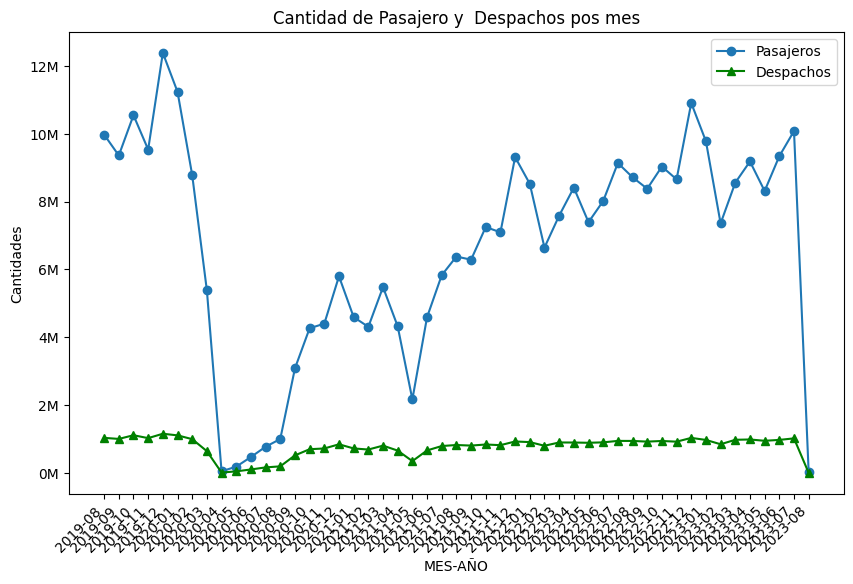

In [31]:
#Primero será necesario agrupar los datos por mes-año según Fecha Despacho
data['FECHA_DESPACHO'] = pd.to_datetime(data['FECHA_DESPACHO'])
data['MES-AÑO'] = data['FECHA_DESPACHO'].dt.to_period('M')
data_agrupada = grupo_por_columna(data, 'MES-AÑO')


data_agrupada['Variación Despachos(%)'] = (data_agrupada['DESPACHOS'].pct_change() * 100).round(2)
data_agrupada['Variación Pasajeros (%)'] = (data_agrupada['PASAJEROS'].pct_change() * 100).round(2)

print(data_agrupada)
print(data_agrupada)
data_agrupada['MES-AÑO'] = data_agrupada['MES-AÑO'].astype(str)

#Graficar los datos
plt.figure(figsize=(10,6))
ax = plt.gca()
plt.plot(data_agrupada['MES-AÑO'], data_agrupada['PASAJEROS'], label = 'Pasajeros', marker = 'o')
plt.plot(data_agrupada['MES-AÑO'], data_agrupada['DESPACHOS'], label = 'Despachos', marker = '^', color='green')
ax.yaxis.set_major_formatter(FuncFormatter(formato_ejes))
plt.xlabel('MES-AÑO')
plt.ylabel('Cantidades')
plt.title('Cantidad de Pasajero y  Despachos pos mes')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

Ya que estamos observando la data con base en un rango de 4 años, es interesante poder observar los máximos y mínimos de este, aunque de entrada se observa que los datos del último mes registrado del 2023 (año actual) aun están incompletos lo ideal es rescatar el menor valor sin contemplar este mes sin finalizar. Gracias a la gráfica anterior, el patrón de ambos valores es el mismo, por lo cual se observará el mínimo y máximo de ambos valores independientes en los mismos meses.

In [32]:
#Contempletar datos agrupados sin el último mes en cuestión
data_agrupada_sin_último_mes = data_agrupada.iloc[:-1]

# mes con el menor y mayor cantidad de despachos
mes_menor_despachos = data_agrupada_sin_último_mes.loc[data_agrupada_sin_último_mes['DESPACHOS'].idxmin()]
mes_mayor_despachos = data_agrupada.loc[data_agrupada['DESPACHOS'].idxmax()]

# Extraer los pasajeros según el mínimo anterior
pasajeros_menor_despacho = mes_menor_despachos['PASAJEROS']
pasajeros_mayor_despacho = mes_mayor_despachos['PASAJEROS']

#Imprimir y observar resúltados
print(f"Mes con el mínimo general: {mes_menor_despachos['MES-AÑO']}, Despachos: {mes_menor_despachos['DESPACHOS']}, Pasajeros: {pasajeros_menor_despacho}")
print(f"Mes con el máximo general: {mes_mayor_despachos['MES-AÑO']}, Despachos: {mes_mayor_despachos['DESPACHOS']}, Pasajeros: {pasajeros_mayor_despacho}")


Mes con el mínimo general: 2020-04, Despachos: 11263, Pasajeros: 49238
Mes con el máximo general: 2019-12, Despachos: 1155583, Pasajeros: 12381786


De entrada, el histórico, que nos muestra datos desde los últimos 4 meses del 2019 hasta el mes casi actual del presente año. Se evidencia que la pandemía afectó en gran medida el transporte terrestre de pasajeros. Gracias el máximo y mínimo, se observa que no se ha logrado romper el máximo histórico después de pandemia, lo cuál parece que el viaje a través de terminales terrestres aun requiere esfuerzos para volver a obtener alto tráfico, o existen más autos familiares en carreteras nacionales. No obstante, el año 2023 comenzó casi acercandose a este máximo hitórico, lo cuál debió incrementar esperanzas en las compañías de transporte sobre la expectativas de viaje para este año.

Adicional, como se mencionó antes, el patrón de demanda y oferta de transporte es cohorente y sugiere que se abarca en mejor medida en todo el tiempo recorrido

In [33]:
#Correlación Despachos-Pasajeros
corr = round(data['PASAJEROS'].corr(data['DESPACHOS']), 4)

print(f'Las 2 variables principales entregan una correlación de {corr} lo cual implica que tienden a ser directamente proporcionales entre sí')

Las 2 variables principales entregan una correlación de 0.6422 lo cual implica que tienden a ser directamente proporcionales entre sí


### Variación anual Despachos y Pasajeros
Ya vista la tendencia general en cada uno de los meses presentes en el conjunto de datos, podemos entrar en más detalle sobre esto, observando ésta a nivel de Departamento de Origen, en cuestión anual

In [34]:
#Agrupar la data por fecha de despacho considerando únicamente el año
data['FECHA_DESPACHO'] = pd.to_datetime(data['FECHA_DESPACHO'])
data['AÑO'] = data['FECHA_DESPACHO'].dt.to_period('Y')

#Se agrupa y se presenta en tabla, agregando la varión año a año para cada variable
tendencia_anual_por_departamento = grupo_por_columna(data, ['DEPARTAMENTO_ORIGEN', 'AÑO'])
tendencia_anual_por_departamento['Pasajeros YoY'] = (tendencia_anual_por_departamento.groupby('DEPARTAMENTO_ORIGEN')['PASAJEROS'].pct_change()*100).round(2)
tendencia_anual_por_departamento['Despachos YoY'] = (tendencia_anual_por_departamento.groupby('DEPARTAMENTO_ORIGEN')['DESPACHOS'].pct_change()*100).round(2)
print(tendencia_anual_por_departamento)

#En este punto es necesario indagar en cómo evitar el resultado de variación para años no consecutivos

    DEPARTAMENTO_ORIGEN   AÑO  PASAJEROS  DESPACHOS  Pasajeros YoY  \
0             ANTIOQUIA  2019    6181290     563905            NaN   
1             ANTIOQUIA  2020    6109309     757073          -1.16   
2             ANTIOQUIA  2021    9458524    1115602          54.82   
3             ANTIOQUIA  2022   12989975    1248181          37.34   
4             ANTIOQUIA  2023    8351960     781442         -35.70   
..                  ...   ...        ...        ...            ...   
133     VALLE DEL CAUCA  2022   15386876    1657388          54.27   
134     VALLE DEL CAUCA  2023    8910149     982821         -42.09   
135             VICHADA  2019         24          2            NaN   
136             VICHADA  2022          5          2         -79.17   
137             VICHADA  2023         10          1         100.00   

     Despachos YoY  
0              NaN  
1            34.26  
2            47.36  
3            11.88  
4           -37.39  
..             ...  
133         

In [35]:
#Adicional podemos observar la tendencia mensual para cada departamento de origen
data['FECHA_DESPACHO'] = pd.to_datetime(data['FECHA_DESPACHO'])
data['MES'] = data['FECHA_DESPACHO'].dt.to_period('M')


#Calcular la variación interanual de las variables por Departamento de Origen
tendencia_anual_por_departamento_mes = grupo_por_columna(data, ['DEPARTAMENTO_ORIGEN', 'MES'])
tendencia_anual_por_departamento_mes['Pasajeros MoM'] = (tendencia_anual_por_departamento_mes.groupby('DEPARTAMENTO_ORIGEN')['PASAJEROS'].pct_change()*100).round(2)
tendencia_anual_por_departamento_mes['Despachos MoM'] = (tendencia_anual_por_departamento_mes.groupby('DEPARTAMENTO_ORIGEN')['DESPACHOS'].pct_change()*100).round(2)
print(tendencia_anual_por_departamento_mes)

#Indagar sobre el resultado para varaición en meses no consecutivos

     DEPARTAMENTO_ORIGEN      MES  PASAJEROS  DESPACHOS  Pasajeros MoM  \
0              ANTIOQUIA  2019-08    1071798      92343            NaN   
1              ANTIOQUIA  2019-09    1042247     100782          -2.76   
2              ANTIOQUIA  2019-10    1277182     123703          22.54   
3              ANTIOQUIA  2019-11    1157865     113188          -9.34   
4              ANTIOQUIA  2019-12    1632198     133889          40.97   
...                  ...      ...        ...        ...            ...   
1291             VICHADA  2019-09          8          1            NaN   
1292             VICHADA  2019-10         16          1         100.00   
1293             VICHADA  2022-09          1          1         -93.75   
1294             VICHADA  2022-11          4          1         300.00   
1295             VICHADA  2023-04         10          1         150.00   

      Despachos MoM  
0               NaN  
1              9.14  
2             22.74  
3             -8.50  
4

En teoría, gracias a que los datos del 2019 no abarcan el año completo, la variación observada para el 2020 representaría una cambio alto, no obstante lo sucedido en este año mantuvo ambas variables en una punto constante para ambos años en la mayoría de departamentos. Así mismo, en algunos de estos los despachos mantuvieron cierta normalidad en algunos meses del segundo año. No obstante, la recuperación en el transporte terrestre es observables desde el segundo semestre del 2021 donde las restricciones de pandemia empezaron a obtener mayor flexibilidad.

Tabla por hora despacho:
 HORA_DESPACHO  PASAJEROS  DESPACHOS  PORCENTAJE_PASAJEROS  PORCENTAJE_DESPACHOS
             0    2338151     164813                  0.71                  0.43
             1    1914914     150380                  0.58                  0.40
             2    2012895     165149                  0.61                  0.43
             3    2707214     264680                  0.82                  0.70
             4    5574996     718698                  1.70                  1.89
             5   10558825    1497868                  3.21                  3.94
             6   15533904    2198294                  4.72                  5.78
             7   16378853    2354460                  4.98                  6.19
             8   17676836    2450167                  5.38                  6.45
             9   18513776    2480075                  5.63                  6.53
            10   19808636    2550025                  6.02                  6.71
   

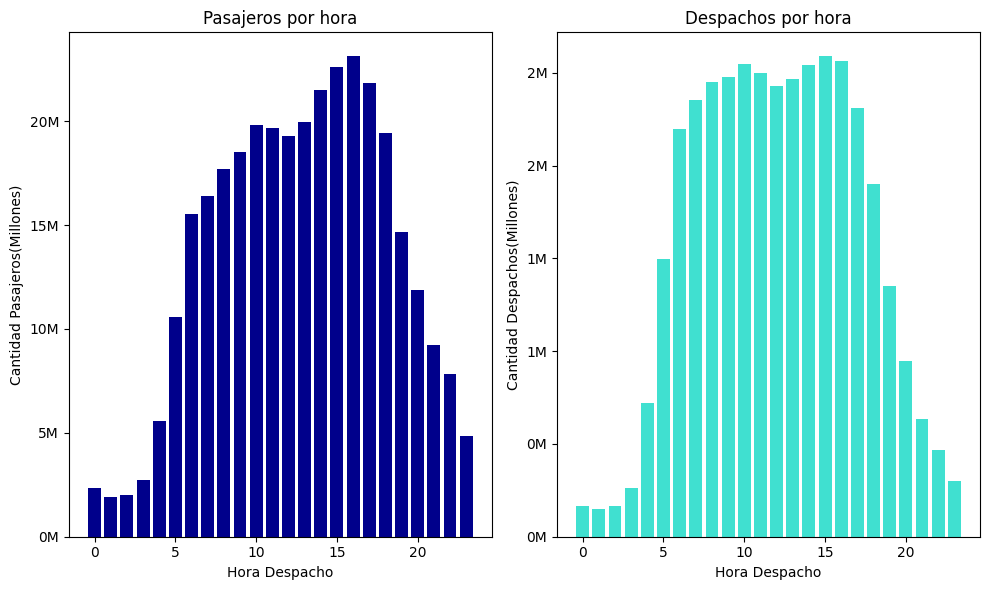

In [36]:
#Ahora observaremos los despachos y pasajeros por horas de despacho
data_por_hora_despacho = grupo_por_columna(data, 'HORA_DESPACHO')
#Calcular las roporciones por hora de despacho
data_por_hora_despacho['PORCENTAJE_PASAJEROS'] = ((data_por_hora_despacho['PASAJEROS'] / total_pasajeros) * 100).round(2)
data_por_hora_despacho['PORCENTAJE_DESPACHOS'] = ((data_por_hora_despacho['DESPACHOS'] / total_despachos) * 100).round(2)
print('Tabla por hora despacho:')
print(data_por_hora_despacho.to_string(index=False))

#Máximos por Hora de despacho
hora_menos_despachos = data_por_hora_despacho.loc[data_por_hora_despacho['DESPACHOS'].idxmin()]
pasajeros_hora_menos_despachos = hora_menos_despachos['PASAJEROS']
hora_mas_despachos = data_por_hora_despacho.loc[data_por_hora_despacho['DESPACHOS'].idxmax()]
pasajeros_hora_mas_despachos = hora_mas_despachos['PASAJEROS']
print(f"Hora menos Despachos: {hora_menos_despachos['HORA_DESPACHO']}, Despachos:{hora_menos_despachos['DESPACHOS']}, Pasajeros:{pasajeros_hora_menos_despachos}")
print(f"Hora más Despachos: {hora_mas_despachos['HORA_DESPACHO']}, Despachos:{hora_mas_despachos['DESPACHOS']}, Pasajeros:{pasajeros_hora_mas_despachos}")

#Mínimos por hora de despacho
hora_menos_pasajeros = data_por_hora_despacho.loc[data_por_hora_despacho['PASAJEROS'].idxmin()]
despachos_hora_menos_pasajeros = hora_menos_pasajeros['DESPACHOS']
hora_mas_pasajeros = data_por_hora_despacho.loc[data_por_hora_despacho['PASAJEROS'].idxmax()]
despachos_hora_mas_pasajeros = hora_mas_despachos['DESPACHOS']
print(f"Hora menos Pasajeross: {hora_menos_pasajeros['HORA_DESPACHO']}, Pasajeros:{hora_menos_pasajeros['PASAJEROS']}, Despachos:{despachos_hora_menos_pasajeros}")
print(f"Hora más Pasajeros: {hora_mas_pasajeros['HORA_DESPACHO']}, Pasajeros:{hora_mas_pasajeros['PASAJEROS']}, Despachos:{despachos_hora_mas_pasajeros}")

#Gráfica 
plt.figure(figsize=(10, 6))

plt.subplot(1,2,1)
plt.bar(data_por_hora_despacho['HORA_DESPACHO'], data_por_hora_despacho['PASAJEROS'], color='darkblue')
plt.xlabel('Hora Despacho')
plt.ylabel('Cantidad Pasajeros(Millones)')
plt.title('Pasajeros por hora')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))


plt.subplot(1,2,2)
plt.bar(data_por_hora_despacho['HORA_DESPACHO'], data_por_hora_despacho['DESPACHOS'], color = 'turquoise')
plt.xlabel('Hora Despacho')
plt.ylabel('Cantidad Despachos(Millones)')
plt.title('Despachos por hora')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))

plt.tight_layout()
plt.show()

Es curioso ver que a pesar del saber común en el país donde se considera mejor viajar por la noche, la concentración de despachos y pasajeros se distribuye en horas del día, entre las 7a.m. y 6p.m.. Puede deberse a las condiciones de la carreteras en estos momentos o como veremos más adelante el destino de la mayoría de despachos ejecutados por departamento.

Tabla por clase de vehículo
  CLASE_VEHICULO  PASAJEROS  DESPACHOS  PORCENTAJE_PASAJEROS  \
1            BUS  153289572   13281375                 46.62   
5       MICROBUS  109273832   13779726                 33.23   
2         BUSETA   31212565    4217655                  9.49   
3      CAMIONETA   23924802    4185573                  7.28   
4        CAMPERO    5757574     906130                  1.75   
0      AUTOMOVIL    5349691    1637707                  1.63   

   PORCENTAJE_DESPACHOS  PASAJERO_PROM_POR_VEHÍCULO  
1                 34.94                       11.54  
5                 36.25                        7.93  
2                 11.10                        7.40  
3                 11.01                        5.72  
4                  2.38                        6.35  
0                  4.31                        3.27  


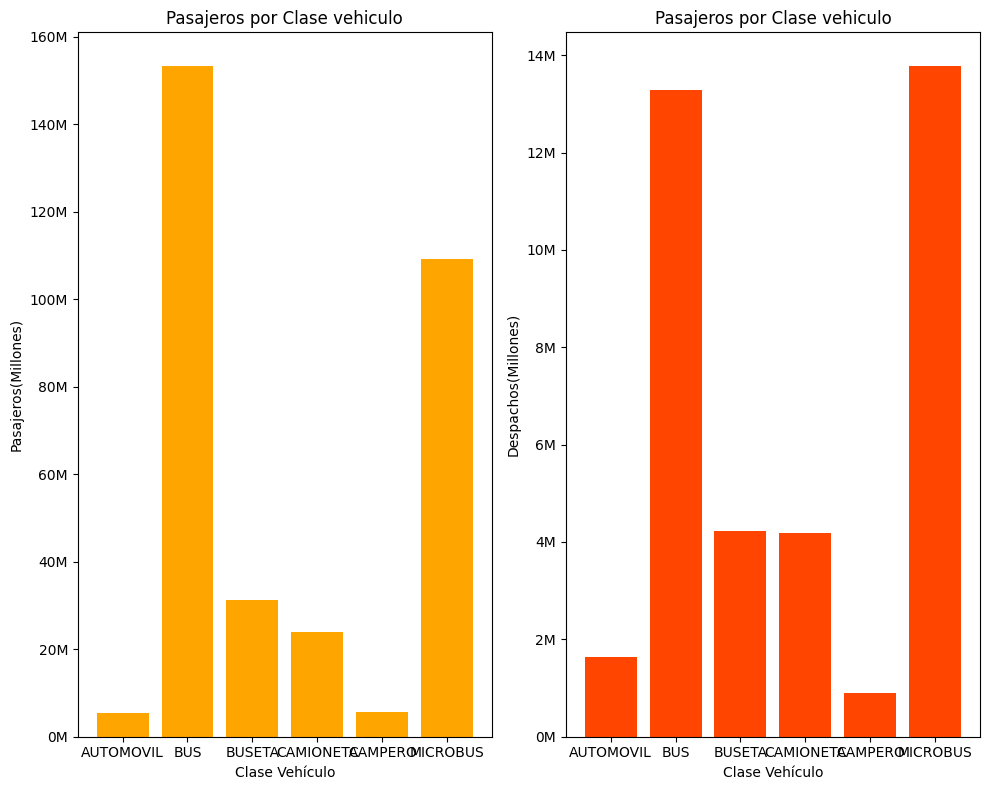

In [37]:
#Ahora se agrupará y presentarán los depachos y pasajeros por tipo de vehículo
data_por_vehiculo = grupo_por_columna(data, 'CLASE_VEHICULO')
#Proporciones por clase de vehículo
data_por_vehiculo['PORCENTAJE_PASAJEROS'] = ((data_por_vehiculo['PASAJEROS'] / total_pasajeros) * 100).round(2)
data_por_vehiculo['PORCENTAJE_DESPACHOS'] = ((data_por_vehiculo['DESPACHOS'] / total_despachos) * 100).round(2)
data_por_vehiculo['PASAJERO_PROM_POR_VEHÍCULO'] = (data_por_vehiculo['PASAJEROS']/data_por_vehiculo['DESPACHOS']).round(2)
#Presentar resultados en formato de tabla
print('Tabla por clase de vehículo')
print(data_por_vehiculo.sort_values('PASAJEROS', ascending=False))

#Gráfica 
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.bar(data_por_vehiculo['CLASE_VEHICULO'], data_por_vehiculo['PASAJEROS'], color = 'orange')
plt.xlabel('Clase Vehículo')
plt.ylabel('Pasajeros(Millones)')
plt.title('Pasajeros por Clase vehiculo')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))

plt.subplot(1,2,2)
plt.bar(data_por_vehiculo['CLASE_VEHICULO'], data_por_vehiculo['DESPACHOS'], color = 'orangered')
plt.xlabel('Clase Vehículo')
plt.ylabel('Despachos(Millones)')
plt.title('Pasajeros por Clase vehiculo')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))

plt.tight_layout()
plt.show()


Si bien la data parece recogerse a través de las terminales de transporte de cada departamento, la clase de vehículos contempla medios de transporte con bajo cupo de pasajeros (Automóvil, Camioneta y Campero), adicional parece que la camioneta ofrece capacidad de pasajeros casi similar a la buseta, según la proporción observada. Es curioso porque implica que son viajes personalizados adquiridos o que son de distancias cortas y que las Empresas de Transporte intermunicipal ofrecen servicio a este nivel de distribución.

Tabla por Nivel de Servicio
         NIVEL_SERVICIO  PASAJEROS  DESPACHOS  PORCENTAJE_PASAJEROS  \
1                  LUJO  207429520   24346632                 63.09   
0                BASICO  121278506   13657299                 36.88   
2  PREFERENCIAL DE LUJO     100010       4235                  0.03   

   PORCENTAJE_DESPACHOS  
1                 64.06  
0                 35.93  
2                  0.01  


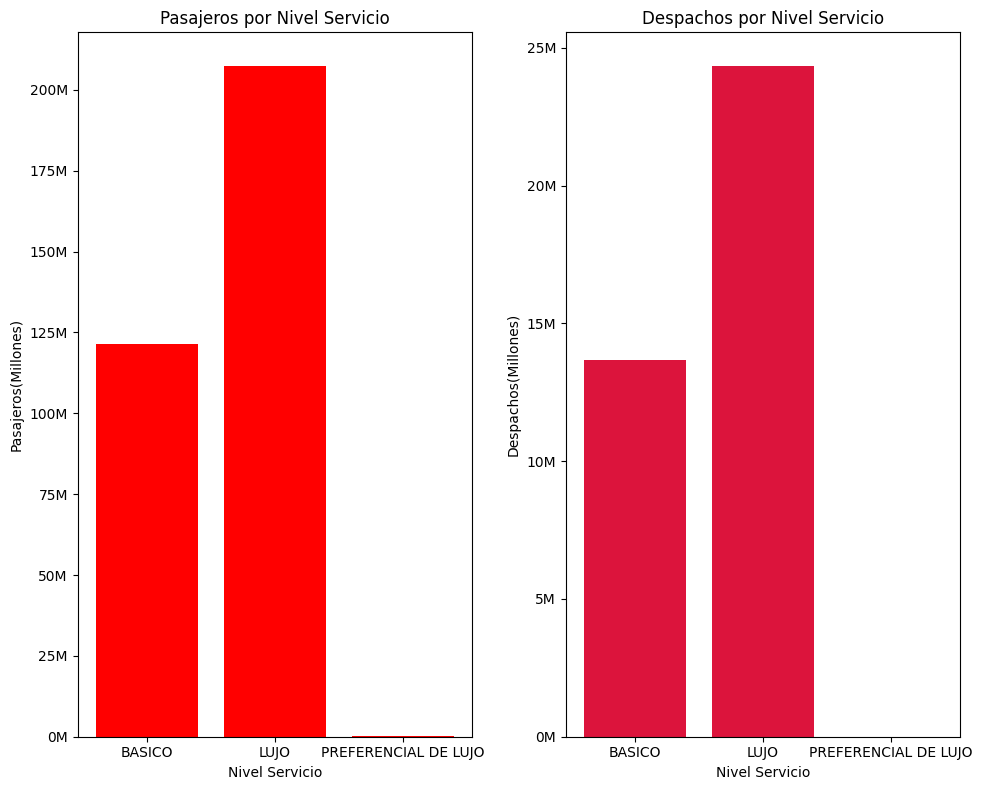

In [38]:
#Ahora se agrupará y presentarán los depachos y pasajeros por tipo de vehículo y se calcularán las proporciones por
#tipo de servicio
data_por_servicio = grupo_por_columna(data, 'NIVEL_SERVICIO')

#Proporciones por nivel de servicio
data_por_servicio['PORCENTAJE_PASAJEROS'] = ((data_por_servicio['PASAJEROS'] / total_pasajeros) * 100).round(2)
data_por_servicio['PORCENTAJE_DESPACHOS'] = ((data_por_servicio['DESPACHOS'] / total_despachos) * 100).round(2)
print('Tabla por Nivel de Servicio')
print(data_por_servicio.sort_values('PASAJEROS', ascending=False))

#Gráfica 
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.bar(data_por_servicio['NIVEL_SERVICIO'], data_por_servicio['PASAJEROS'], color = 'red')
plt.xlabel('Nivel Servicio')
plt.ylabel('Pasajeros(Millones)')
plt.title('Pasajeros por Nivel Servicio')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))

plt.subplot(1,2,2)
plt.bar(data_por_servicio['NIVEL_SERVICIO'], data_por_servicio['DESPACHOS'], color = 'crimson')
plt.xlabel('Nivel Servicio')
plt.ylabel('Despachos(Millones)')
plt.title('Despachos por Nivel Servicio')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))

plt.tight_layout()
plt.show()


In [39]:
#Dado que hay cierto tipo de vehículos cuya carga de pasajeros es más pequeña, se hará una observación de estos en varias
#de sus características
vehiculo_pequeño = grupo_por_columna(data, ['CLASE_VEHICULO', 'NIVEL_SERVICIO'])
vehiculo_pequeño = vehiculo_pequeño.loc[(vehiculo_pequeño['CLASE_VEHICULO'] == 'AUTOMOVIL') | (vehiculo_pequeño['CLASE_VEHICULO'] == 'CAMPERO')]
print('Data carros pequeños')
print(vehiculo_pequeño)

Data carros pequeños
   CLASE_VEHICULO        NIVEL_SERVICIO  PASAJEROS  DESPACHOS
0       AUTOMOVIL                BASICO    2112626     646306
1       AUTOMOVIL                  LUJO    3236977     991379
2       AUTOMOVIL  PREFERENCIAL DE LUJO         88         22
12        CAMPERO                BASICO    3998987     565631
13        CAMPERO                  LUJO    1758569     340497
14        CAMPERO  PREFERENCIAL DE LUJO         18          2


Así bien, puede entenderse que el nivel de servicio preferencial de lujo debe ser un servicio adquirido de forma especial por agencia, mientras que lujo puede relacionarse a paquetes de turismo. No hay un diccionario en la data para entender esta referencia, así mismo, no se hace exclusivo de vehículos pequeños y puede observarse sobre los vehículos más grandes también.

Tabla por Departamento de Origen
   DEPARTAMENTO_ORIGEN  PASAJEROS  DESPACHOS  PORCENTAJE_PASAJEROS  \
3         BOGOTÁ, D.C.   49740450    5935659                 15.13   
26     VALLE DEL CAUCA   50407425    5823413                 15.33   
0            ANTIOQUIA   43091058    4466203                 13.11   
5               BOYACÁ   23123539    2998901                  7.03   
21             QUINDÍO   16093982    2232238                  4.89   
22           RISARALDA   15839237    1946710                  4.82   
14               HUILA   15618202    1803778                  4.75   
18              NARIÑO   14857892    1594672                  4.52   
25              TOLIMA   14249995    1556581                  4.33   
6               CALDAS    8945195    1029945                  2.72   
4              BOLÍVAR    9768298     888318                  2.97   
19  NORTE DE SANTANDER    6464906     854337                  1.97   
12        CUNDINAMARCA    7196862     791647             

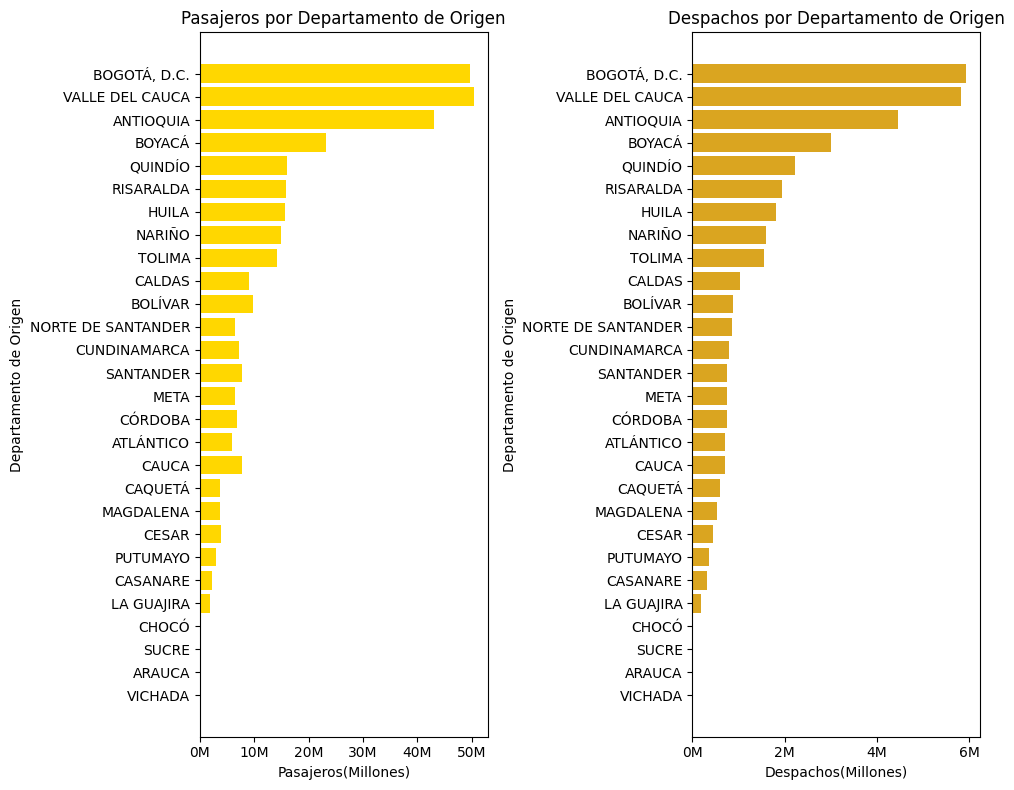

In [40]:
#Ahora se agrupará y presentarán los depachos y pasajeros departamento de origen
data_por_departamento_origen = grupo_por_columna(data, 'DEPARTAMENTO_ORIGEN')

#Proporciones por dapartamento de origne
data_por_departamento_origen['PORCENTAJE_PASAJEROS'] = ((data_por_departamento_origen['PASAJEROS'] / total_pasajeros) * 100).round(2)
data_por_departamento_origen['PORCENTAJE_DESPACHOS'] = ((data_por_departamento_origen['DESPACHOS'] / total_despachos) * 100).round(2)

#En este caso se ordenarán de mayor a menos los valores por el campo de Despachos de esta forma para que 
#en la gráfica obtengamos este mismo orden
data_por_departamento_origen = data_por_departamento_origen.sort_values('DESPACHOS', ascending=False)

print('Tabla por Departamento de Origen')
print(data_por_departamento_origen)

#Gráfica 
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.barh(data_por_departamento_origen['DEPARTAMENTO_ORIGEN'], data_por_departamento_origen['PASAJEROS'], color = 'gold')
plt.xlabel('Pasajeros(Millones)')
plt.ylabel('Departamento de Origen')
plt.title('Pasajeros por Departamento de Origen')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))

plt.subplot(1,2,2)
plt.barh(data_por_departamento_origen['DEPARTAMENTO_ORIGEN'], data_por_departamento_origen['DESPACHOS'], color = 'goldenrod')
plt.xlabel('Despachos(Millones)')
plt.ylabel('Departamento de Origen')
plt.title('Despachos por Departamento de Origen')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))

plt.tight_layout()
plt.show()


Tabla por Departamento de Destino
   DEPARTAMENTO_DESTINO  PASAJEROS  DESPACHOS  PORCENTAJE_PASAJEROS  \
27      VALLE DEL CAUCA   47195299    5112841                 14.35   
0             ANTIOQUIA   42142335    4576170                 12.82   
3          BOGOTÁ, D.C.   34843203    2739924                 10.60   
5                BOYACÁ   21520575    3024779                  6.55   
12         CUNDINAMARCA   16935871    2896221                  5.15   
22              QUINDÍO   16138548    2145238                  4.91   
19               NARIÑO   14734527    1537865                  4.48   
15                HUILA   14146875    1797525                  4.30   
26               TOLIMA   13261785    1702949                  4.03   
23            RISARALDA   10454837    1447404                  3.18   
6                CALDAS   10417485    1276710                  3.17   
9                 CAUCA    9747151    1101105                  2.96   
24            SANTANDER    9379947    10155

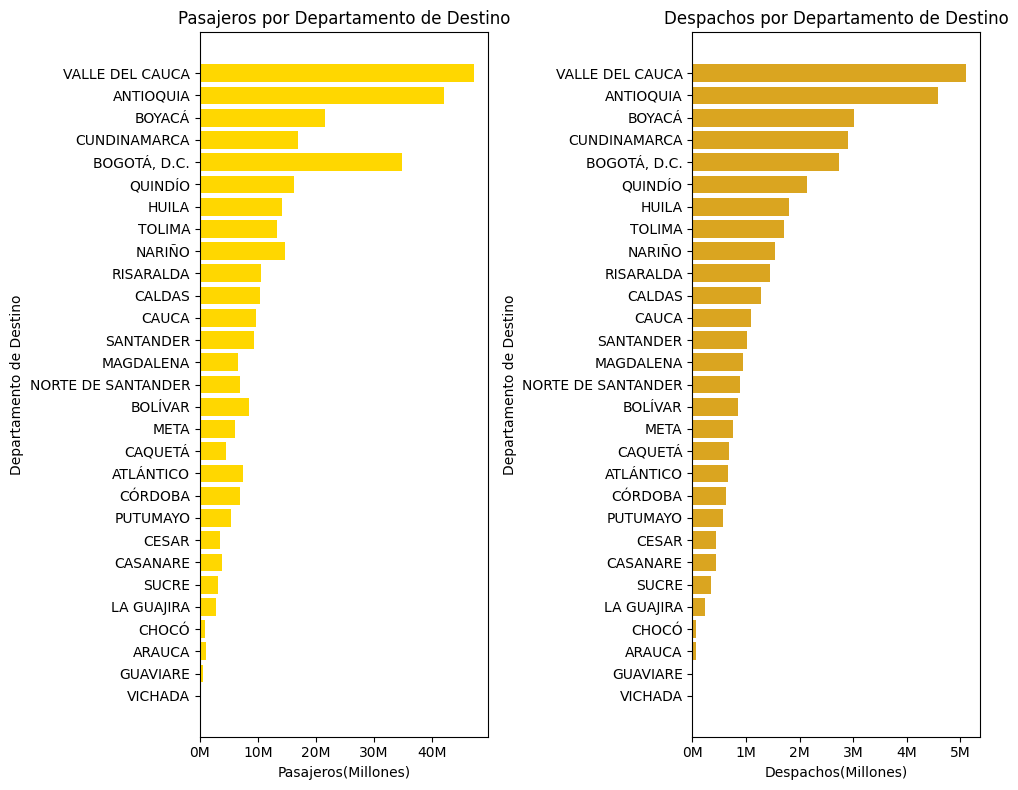

In [49]:
#Ahora se agrupará y presentarán los depachos y pasajeros por departamento de destino
data_por_departamento_destino = grupo_por_columna(data, 'DEPARTAMENTO_DESTINO')

#Proporciones por nivel de destino
data_por_departamento_destino['PORCENTAJE_PASAJEROS'] = ((data_por_departamento_destino['PASAJEROS'] / total_pasajeros) * 100).round(2)
data_por_departamento_destino['PORCENTAJE_DESPACHOS'] = ((data_por_departamento_destino['DESPACHOS'] / total_despachos) * 100).round(2)

#En este caso se ordenarán de mayor a menos los valores por el campo de Despachos de esta forma para que 
#en la gráfica obtengamos este mismo orden
data_por_departamento_destino = data_por_departamento_destino.sort_values('DESPACHOS', ascending=False)

print('Tabla por Departamento de Destino')
print(data_por_departamento_destino.sort_values('PASAJEROS', ascending=False))

#Gráfica 
plt.figure(figsize=(10, 8))

plt.subplot(1,2,1)
plt.barh(data_por_departamento_destino['DEPARTAMENTO_DESTINO'], data_por_departamento_destino['PASAJEROS'], color = 'gold')
plt.xlabel('Pasajeros(Millones)')
plt.ylabel('Departamento de Destino')
plt.title('Pasajeros por Departamento de Destino')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))

plt.subplot(1,2,2)
plt.barh(data_por_departamento_destino['DEPARTAMENTO_DESTINO'], data_por_departamento_destino['DESPACHOS'], color = 'goldenrod')
plt.xlabel('Despachos(Millones)')
plt.ylabel('Departamento de Destino')
plt.title('Despachos por Departamento de Destino')
plt.gca().invert_yaxis()
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formato_ejes))

plt.tight_layout()
plt.show()


La vista general entre origenes y destino, ofrece 2 focos de concentración interesantes. Gran cantidad de viajes salen desde la Capital del país y éste mismo se ubica en el 3er puesto de recepción de pasajeros, mientras que el Valle del Cauca, el departamento ubicado más al sur con gran afluencia en las variables, entrega el segundo punto de origenes de viajes y obtiene el primer puesto como destino predilecto de éstos. Seguidos de Antioquia entre los departamentos de renombre.

DEPARTAMENTO_DESTINO  ANTIOQUIA  ARAUCA  ATLÁNTICO  BOGOTÁ, D.C.  BOLÍVAR  \
DEPARTAMENTO_ORIGEN                                                         
ANTIOQUIA               3865795       0      17793         58209    32572   
ARAUCA                        0     590          0          3940        0   
ATLÁNTICO                 18975       0         98         34744   144814   
BOGOTÁ, D.C.              39613   35087      23047          6583    84069   
BOLÍVAR                   22632       0     129790         58963   445481   
BOYACÁ                       30     215          0        552205      141   
CALDAS                    47740       0          6         56375     2392   
CAQUETÁ                    3682       0          0         32238        0   
CASANARE                      0    5337          0         75739        0   
CAUCA                      1732       0          0          9531        3   
CESAR                      4395       0      55850         19784     1599   

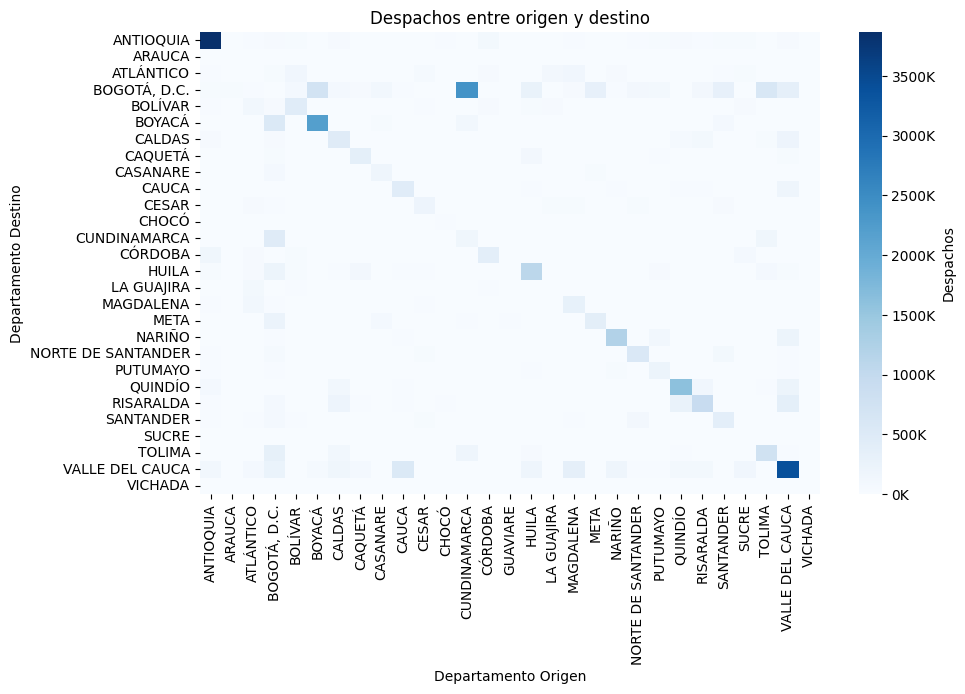

In [42]:
#Despachos entre origen y destino
origen_vs_destino = data.pivot_table(index = 'DEPARTAMENTO_ORIGEN', columns = 'DEPARTAMENTO_DESTINO',
                                      values = 'DESPACHOS', aggfunc='sum', fill_value=0)
print(origen_vs_destino)

#Fromato barra de color para el mapa de calor
def formato_mapa(x, pos):
    return f'{int(x/1e3)}K'
#Gráfica
plt.figure(figsize = (10,6))
sns.heatmap(origen_vs_destino, cmap = 'Blues', cbar_kws={'label': 'Despachos', 'format': FuncFormatter(formato_mapa)})
plt.title('Despachos entre origen y destino')
plt.xlabel('Departamento Origen')
plt.ylabel('Departamento Destino')
plt.show()

Básicamente viendo la distribución del mapa de calor, se explica de mejor forma el comportamiento de destino-origen y el tipo de vehículo implementado, puesto que esta data, fuera de lo esperado para el análisis en cuestión, presenta comportamiento de viajes sobretodo al interior de cada departamento, ubicando gran afluencia de, posiblemente, viajes de trabajo en municipios aledaños (por eso la distribución de horas), viajes de turismo cortos. O casos como el de Bogotá D.C. requerimientos, vueltas personales y de salud de comunidades del departamento de Cundinamarca que deben ir a la capital a suplir sus necesidades, entre otras razones más por explorar.

In [43]:
#Dada la distribución de los departamentos, es interesante observar la cantidad de destinos que estos realizan
dept_origen_destinos_unicos = grupo_por_columna(data,'DEPARTAMENTO_ORIGEN')
dept_origen_destinos_unicos['Municipios Origen Únicos'] = data.groupby('DEPARTAMENTO_ORIGEN')['MUNICIPIO_ORIGEN'].nunique().reset_index(drop=True)
dept_origen_destinos_unicos['Destinos Únicos'] = data.groupby('DEPARTAMENTO_ORIGEN')['DEPARTAMENTO_DESTINO'].nunique().reset_index(drop=True)
dept_origen_destinos_unicos['Municipios Destino Únicos'] = data.groupby('DEPARTAMENTO_ORIGEN')['MUNICIPIO_DESTINO'].nunique().reset_index(drop=True)
print(dept_origen_destinos_unicos.sort_values('DESPACHOS', ascending=False))

   DEPARTAMENTO_ORIGEN  PASAJEROS  DESPACHOS  Municipios Origen Únicos  \
3         BOGOTÁ, D.C.   49740450    5935659                         1   
26     VALLE DEL CAUCA   50407425    5823413                        16   
0            ANTIOQUIA   43091058    4466203                        10   
5               BOYACÁ   23123539    2998901                        69   
21             QUINDÍO   16093982    2232238                         2   
22           RISARALDA   15839237    1946710                        12   
14               HUILA   15618202    1803778                        23   
18              NARIÑO   14857892    1594672                        10   
25              TOLIMA   14249995    1556581                        31   
6               CALDAS    8945195    1029945                        16   
4              BOLÍVAR    9768298     888318                         3   
19  NORTE DE SANTANDER    6464906     854337                         7   
12        CUNDINAMARCA    7196862     

Sin embargo, la data general ofrece que los departamento principales distribuyen viajes y pasajeros a casi todos los departamentos posibles, lo cual hace que se deba implementar otras opciones de exploración para dar la explicación concreta del comportamiento de viajes en este conjunto de datos.

In [44]:
#Y en el caso contrario también
dept_destino_origen_unico = grupo_por_columna(data,'DEPARTAMENTO_DESTINO')
dept_destino_origen_unico['Origenes Únicos'] = data.groupby('DEPARTAMENTO_DESTINO')['DEPARTAMENTO_ORIGEN'].nunique().reset_index(drop=True)
print(dept_destino_origen_unico.sort_values('DESPACHOS', ascending=False))


   DEPARTAMENTO_DESTINO  PASAJEROS  DESPACHOS  Origenes Únicos
27      VALLE DEL CAUCA   47195299    5112841               21
0             ANTIOQUIA   42142335    4576170               24
5                BOYACÁ   21520575    3024779               14
12         CUNDINAMARCA   16935871    2896221               11
3          BOGOTÁ, D.C.   34843203    2739924               27
22              QUINDÍO   16138548    2145238               13
15                HUILA   14146875    1797525               17
26               TOLIMA   13261785    1702949               17
19               NARIÑO   14734527    1537865               14
23            RISARALDA   10454837    1447404               15
6                CALDAS   10417485    1276710               20
9                 CAUCA    9747151    1101105               11
24            SANTANDER    9379947    1015539               18
17            MAGDALENA    6639124     936361               14
20   NORTE DE SANTANDER    6960120     894258          

In [45]:
mun_destino_origen_unico = grupo_por_columna(data,'MUNICIPIO_DESTINO')
mun_destino_origen_unico['Origenes Únicos'] = data.groupby('MUNICIPIO_DESTINO')['MUNICIPIO_ORIGEN'].nunique().reset_index(drop=True)
print(mun_destino_origen_unico.sort_values('DESPACHOS', ascending=False))

       MUNICIPIO_DESTINO  PASAJEROS  DESPACHOS  Origenes Únicos
80          BOGOTÁ, D.C.   34843203    2739924              200
620     SANTIAGO DE CALI   18825994    1569191               83
421                NEIVA    5816772     723606               51
612  SANTA ROSA DE CABAL    2645663     671342                1
645             SOGAMOSO    5706175     646823               40
..                   ...        ...        ...              ...
716              URAMITA         20          1                1
372              MALLAMA          8          1                1
365       LÓPEZ DE MICAY         12          1                1
221             EL PIÑÓN          3          1                1
269             GUACHENÉ          6          1                1

[770 rows x 4 columns]


In [46]:
mun_origen_destino_unico = grupo_por_columna(data,'MUNICIPIO_ORIGEN')
mun_origen_destino_unico['Destinos Únicos'] = data.groupby('MUNICIPIO_ORIGEN')['MUNICIPIO_DESTINO'].nunique().reset_index(drop=True)
print(mun_origen_destino_unico.sort_values('DESPACHOS', ascending=False))

     MUNICIPIO_ORIGEN  PASAJEROS  DESPACHOS  Destinos Únicos
36       BOGOTÁ, D.C.   49740450    5935659              300
273  SANTIAGO DE CALI   37746586    4356149              101
161          MEDELLÍN   37268960    3316325              168
20            ARMENIA   16099824    2232705               42
204           PEREIRA   15835905    1946175               54
..                ...        ...        ...              ...
131       JESÚS MARÍA         23          1                1
295            TERUEL          4          1                1
300         TIPACOQUE          2          1                1
47        CAMPOALEGRE         12          1                1
327            YOTOCO          8          1                1

[328 rows x 4 columns]


### **Observación General**

La data recolectada, si bien menciona que se origina desde cada Terminal registrada, puede ahondarse en dar mayor claridad sobre el nivel de servicio mencionado, y gracias a data de otras fuentes podría darse explicaciones más profundas en el asunto. Así mismo, la concentración de viajes al interior de cada departamento, puedría considerar poder ampliar las características de registro de información, conociendo el tipo de viaje realizado en ciertos pasajeros. Es un conjunto apto para conocer el comportamiento de pasajeros, y el fin principal de análisis no hay información explícita sobre las compañías que registraron la data, para dar una mayor relación en la partipación de éstas, la recuperación de sus servicios desde la pandemia y demás características para indagar en el portafolio ofrecido.

In [47]:
# Nombre del archivo Excel en el que se guardarán las hojas
#nombre_archivo_excel = 'TablasPruebaPinbusDC.xlsx'

# Crear un objeto ExcelWriter para guardar los DataFrames en un archivo Excel
#writer = pd.ExcelWriter(nombre_archivo_excel, engine='xlsxwriter')

# Escribir cada DataFrame en una hoja separada en el archivo Excel
#data_agrupada.to_excel(writer, sheet_name='Tendencia y variación Mensual', index=False)
#tendencia_anual_por_departamento.to_excel(writer, sheet_name='Tendencia Anual Departamento', index=False)
#tendencia_anual_por_departamento_mes.to_excel(writer, sheet_name='Tendencia Mensual Departamento', index=False)
#data_por_hora_despacho.to_excel(writer, sheet_name='Desp&Pas Hora Despacho', index=False)
#data_por_vehiculo.to_excel(writer, sheet_name='Desp6Pas Tipo Vehiculo', index=False)
#data_por_servicio.to_excel(writer, sheet_name='Desp6Pas Nivel de Servicio', index=False)
#data_por_departamento_origen.to_excel(writer, sheet_name='Des&Pas Departamento Origen', index=False)
#data_por_departamento_destino.to_excel(writer, sheet_name='Desp&Pas Departamento Destino', index=False)
#origen_vs_destino.to_excel(writer, sheet_name='Desp&Pas Origen-Destino', index=False)
#dept_origen_destinos_unicos.to_excel(writer, sheet_name='Destinos Unicos por Origen', index=False)
#dept_destino_origen_unico.to_excel(writer, sheet_name='Origen Unico por Destino', index=False)

# Guardar el archivo Excel
#writer.close()

#print("DataFrames guardados en el archivo Excel con hojas separadas.")


In [48]:
#Exportación de Tablas a Google Sheets
#import gspread
#from google.oauth2.service_account import Credentials

#credenciales = "D:\Docs\HV\ProcesosSelección\exportacion2-2e56258e63f8.json"
#credenciales = Credentials.from_service_account_file(credenciales)
#alcance = ['https://spreadsheets.google.com/feeds', 'https://www.googleapis.com/auth/drive']
#creds = Credentials.from_service_account_file(credenciales, scopes=alcance)
#aut = gspread.authorize(creds)

#expor = aut.create('ExportacionTablasPB')

#urlexp = expor.url
#print(f'Link Google Sheet: {urlexp}')

#aut.df_to_sheet(data_agrupada, index=False, sheet='Tendencia y variación Mensual')
#aut.df_to_sheet(tendencia_anual_por_departamento, index=False, sheet='Tendencia Anual por Departamento')
#aut.df_to_sheet(tendencia_anual_por_departamento_mes, index=False, sheet='Tendencia Mensual por Departamento')
#aut.df_to_sheet(data_por_hora_despacho, index=False, sheet='Desp y Pas por Hora Despacho')
#aut.df_to_sheet(data_por_vehiculo, index=False, sheet='Desp y Pas por Tipo Vehiculo')
#aut.df_to_sheet(data_por_servicio, index=False, sheet='Desp y Pas por Nivel de Servicio')
#aut.df_to_sheet(data_por_departamento_origen, index=False, sheet='Desp y Pas por Departamento Origen')
#aut.df_to_sheet(data_por_departamento_destino, index=False, sheet='Desp y Pas por Departamento Destino')
#aut.df_to_sheet(origen_vs_destino, index=False, sheet='Desp y Pas Origen-Destino')
#aut.df_to_sheet(dept_origen_destinos_unicos, index=False, sheet='Destinos Unicos por Origen')
#aut.df_to_sheet(dept_destino_origen_unico, index=False, sheet='Origen Unico por Destino')#

